EDA for demographics_event_train
1. Merge dataset
2. Age 
3. Marital status

Questions:
- How different age related to motality/readmission
- How to deal with inbalanced dataset
- How to deal with event data (string of date-time) https://www.programiz.com/python-programming/datetime/strftime
- Check missing values and invalid values.
- How is agentorangeflag and serviceconnectedflag and veteran_flag relationships
- How ruca category related to motality/readmission
- Technique for imputating categorical data https://stackoverflow.com/questions/62015823/imputating-categorical-data-in-python-nearest-previous-value
- Encoding string/category to numbers.



Process columns: Age at update, Event date, Marital status, Ruca category
1. Clean nan/invalid values using imputation.
2. Encoding categorical values.
3. 


# Import Data & Basic Exploration

In [297]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import preprocess_data 

reload(preprocess_data)

%matplotlib inline

In [298]:
inpatients_with_readm = pd.read_csv('/home/daisy/FDA_Dataset/inpatients_with_readm.csv').iloc[:,1:]
demographics_event_train = pd.read_csv('/home/bhatti/dataset/VCHAMPS/demographics_event_train.csv').iloc[:,1:]

In [299]:
inpatient_demographics_event = inpatients_with_readm.merge(demographics_event_train, how = 'left', on = 'Internalpatientid')
inpatient_demographics_event.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission,Age at update,Event date,Marital status,Ruca category
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,No,No,NaN,Yes,Utah,0,72.394105,2022-08-29 01:05:08.0,Married,Urban
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,No,Yes,No,No,North Carolina,1,88.980142,2014-12-20 05:48:29.0,Separated,Urban
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,No,No,NaN,No,North Carolina,1,88.980142,2014-12-20 05:48:29.0,Separated,Urban
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,No,Yes,NaN,Yes,Florida,0,75.305350,2024-08-16 02:31:43.0,Divorced,Urban
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,No,No,NaN,NaN,Idaho,0,83.427331,2000-04-04 16:32:52.0,Married,Rural


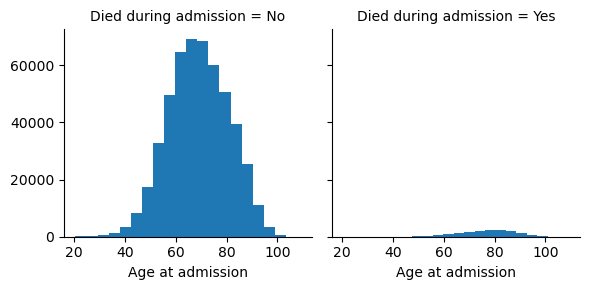

In [300]:
age_mortality = sns.FacetGrid(inpatient_demographics_event, col='Died during admission')
age_mortality.map(plt.hist, 'Age at admission', bins=20)

In [301]:
inpatient_demographics_event[inpatient_demographics_event['Died during admission'] == 'Yes']['Agentorangeflag'].value_counts() / inpatient_demographics_event['Agentorangeflag'].value_counts() 

No     0.031234
Yes    0.021065
Name: Agentorangeflag, dtype: float64

In [302]:
inpatient_demographics_event[inpatient_demographics_event['Died during admission'] == 'Yes']['Serviceconnectedflag'].value_counts() / inpatient_demographics_event['Serviceconnectedflag'].value_counts() 

No     0.059350
Yes    0.043134
Name: Serviceconnectedflag, dtype: float64

In [303]:
inpatient_demographics_event['Marital status'].value_counts()

Married                     228820
Divorced                    146894
Widowed                      71298
Never married                51879
Separated                    21802
Not specified (no value)       866
Unknown                        782
Single                         399
Name: Marital status, dtype: int64

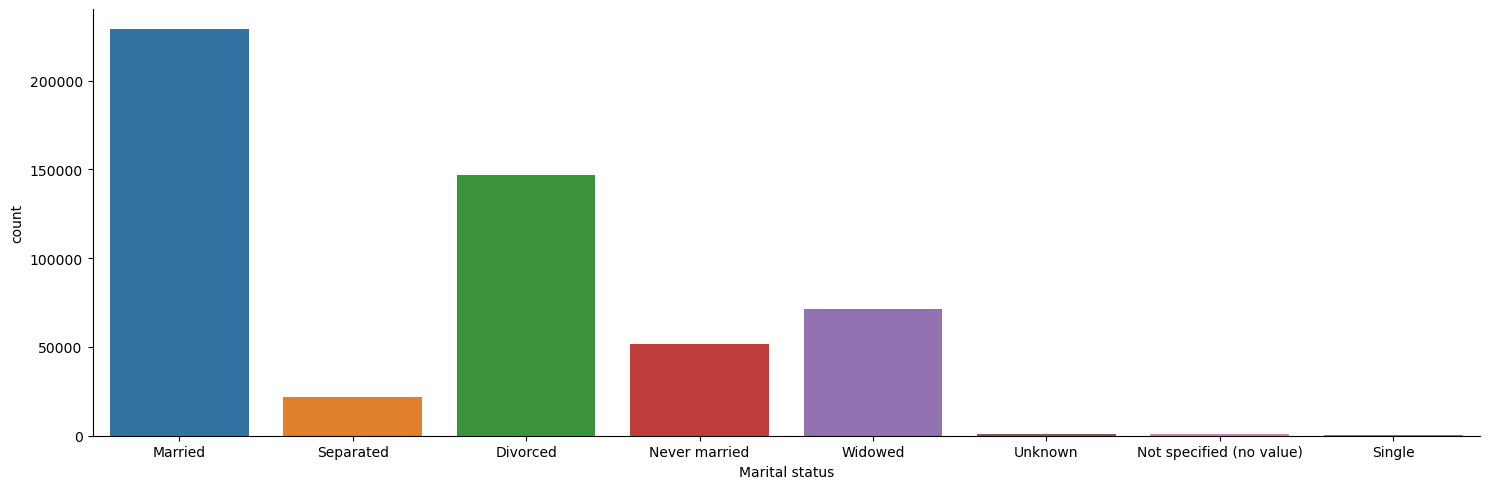

In [304]:
sns.catplot(data=inpatient_demographics_event, x='Marital status', kind="count", aspect=3)

In [305]:
inpatient_demographics_event['Ruca category'].value_counts()

Urban            356784
Rural            158488
Highly rural       5980
Not specified      1488
Name: Ruca category, dtype: int64

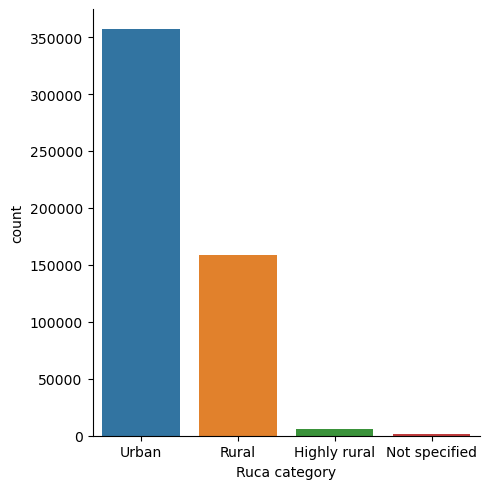

In [306]:
sns.catplot(data=inpatient_demographics_event, x='Ruca category', kind="count", aspect=1)

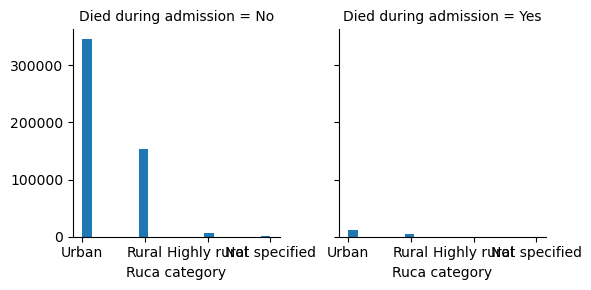

In [307]:
age_mortality = sns.FacetGrid(inpatient_demographics_event, col='Died during admission')
age_mortality.map(plt.hist, 'Ruca category', bins=20)

In [308]:
inpatient_demographics_event[inpatient_demographics_event['Died during admission'] == 'Yes']['Ruca category'].value_counts() / inpatient_demographics_event['Ruca category'].value_counts() 

Urban            0.031823
Rural            0.030375
Highly rural     0.033612
Not specified    0.017473
Name: Ruca category, dtype: float64

## How different age related to motality

In [309]:
bins = list(range(0,100,10))
inpatient_demographics_event['agesgroup']=pd.cut(inpatient_demographics_event['Age at admission'],bins)


In [310]:
agesGroup = inpatient_demographics_event['agesgroup'].value_counts()

In [311]:
agesGroupDied = inpatient_demographics_event[inpatient_demographics_event['Died during admission'] == 'Yes']['agesgroup'].value_counts()

In [312]:
agesGroupDiedRate = agesGroupDied / agesGroup

We can see age is definitely related to death rate.

# Data Preprocessing


## Investigate Data
The columns for demographics_event: Age at update, Event date, Marital status, Ruca category.
- Age at update -> May have correlations with results.
- Event date -> May have correlations with results.
- Marital status -> Encoding to single / not single + imputating not specified.
- Ruca category -> Encoding to single / not single + imputating not specified.

(Also by checking the Nan values in the table, we can see Outpatientreferralflag, Serviceconnectedflag and Agentorangeflag have Nan may need to be preprocessed. 
E.g.
```inpatient_demographics_event['Serviceconnectedflag'] = inpatient_demographics_event['Serviceconnectedflag'].fillna('unknow')```,
```inpatient_demographics_event['Agentorangeflag'] = inpatient_demographics_event['Agentorangeflag'].fillna('unknow')```
)

In [313]:
pd.isnull(inpatient_demographics_event).sum()

Internalpatientid                                           0
Age at admission                                            0
Admission date                                              0
Discharge date                                            494
Admitting unit service                                      0
Discharging unit service                                    0
Admitting specialty                                         0
Discharging specialty                                       0
First listed discharge diagnosis icd10 subcategory          0
Second listed discharge diagnosis icd10 subcategory         0
Discharge disposition                                       0
Died during admission                                       0
Outpatientreferralflag                                  26443
Serviceconnectedflag                                   487689
Agentorangeflag                                        104512
State                                                       0
Hospital

<Axes: ylabel='Age at update'>

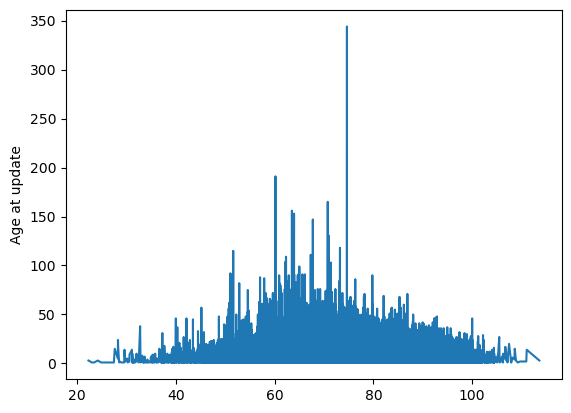

In [314]:
sns.lineplot(inpatient_demographics_event['Age at update'].value_counts())

In [315]:
inpatient_demographics_event['Event date'] = inpatient_demographics_event['Event date'].apply(preprocess_data.preprocess_time_string)

<Axes: ylabel='Event date'>

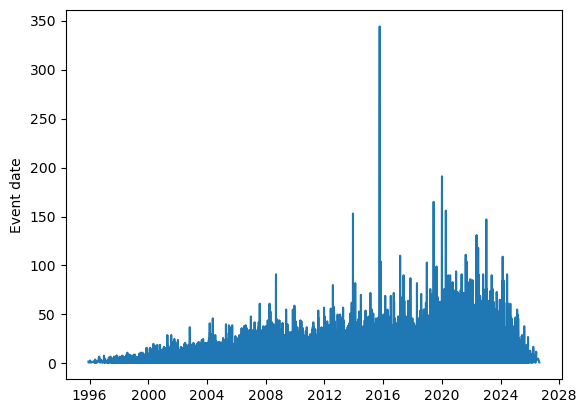

In [316]:
sns.lineplot(inpatient_demographics_event['Event date'].value_counts())

In [317]:
min(inpatient_demographics_event['Event date']) # There is no invalid data

Timestamp('1995-12-01 16:26:28')

In [318]:
inpatient_demographics_event['Marital status'].value_counts()

Married                     228820
Divorced                    146894
Widowed                      71298
Never married                51879
Separated                    21802
Not specified (no value)       866
Unknown                        782
Single                         399
Name: Marital status, dtype: int64

In [319]:
inpatient_demographics_event['Ruca category'].value_counts()

Urban            356784
Rural            158488
Highly rural       5980
Not specified      1488
Name: Ruca category, dtype: int64

## Encoding categorical data
For Marital status:
- Divorced -> Not single - 0
- Never married, Separated, Single， Widowed -> Single - 1
- Not specified (no value) -> imputate

For Ruca category:
- Urban -> Urban - 1
- Highly rural, Rural -> Not urban - 0
- Not specified -> Imputate

In [320]:
marital_status = {'Married': 1, 'Divorced': 0, 'Never married': 1, 'Separated': 1, 'Single': 1, 'Unknown': None, 'Widowed': 1, 'Not specified (no value)': None}
ruca_category = {'Urban': 1, 'Highly rural': 0, 'Rural': 0, 'Not specified': None}

In [321]:
inpatient_demographics_event['Marital status encoded'] = preprocess_data.preprocess_combine_categories(marital_status, 
                                                                               inpatient_demographics_event['Marital status'])

In [322]:
inpatient_demographics_event['Ruca category encoded'] = preprocess_data.preprocess_combine_categories(ruca_category, 
                                                                               inpatient_demographics_event['Ruca category'])

In [323]:
inpatient_demographics_event['Ruca category encoded'].value_counts()

1.0    356784
0.0    164468
Name: Ruca category encoded, dtype: int64

In [324]:
inpatient_demographics_event['Ruca category encoded']

0         1.0
1         1.0
2         1.0
3         1.0
4         0.0
         ... 
522735    1.0
522736    1.0
522737    1.0
522738    1.0
522739    1.0
Name: Ruca category encoded, Length: 522740, dtype: float64

In [329]:
inpatient_demographics_event['Marital status encoded'] = preprocess_data.imputate_nan_binary(inpatient_demographics_event['Marital status encoded'])

/home/vivi/FDA/src/data/preprocess_data.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [330]:
inpatient_demographics_event['Ruca category encoded'] = preprocess_data.imputate_nan_binary(inpatient_demographics_event['Ruca category encoded'])

In [332]:
pd.isnull(inpatient_demographics_event).sum()

Internalpatientid                                           0
Age at admission                                            0
Admission date                                              0
Discharge date                                            494
Admitting unit service                                      0
Discharging unit service                                    0
Admitting specialty                                         0
Discharging specialty                                       0
First listed discharge diagnosis icd10 subcategory          0
Second listed discharge diagnosis icd10 subcategory         0
Discharge disposition                                       0
Died during admission                                       0
Outpatientreferralflag                                  26443
Serviceconnectedflag                                   487689
Agentorangeflag                                        104512
State                                                       0
Hospital